In [1]:
#importing required libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import statistics

In [2]:
#load dataset
data= pd.read_csv('heart.csv')

In [3]:
#checking top 5 row
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#checking bottom 5 row
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#describing dataset
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#sepearating into input and output
x=data.drop(columns='output')
y=data['output']

In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [8]:
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
#splitting dataset
x_train, x_test, y_train ,y_test =train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [10]:
# Importing MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_x_train = scaler.fit_transform(x_train)
rescaled_x_test = scaler.transform(x_test)

In [11]:
#DEfining models
model_DT = tree.DecisionTreeClassifier()
model_KN = KNeighborsClassifier()
model_LR= LogisticRegression()
model_RF=RandomForestClassifier(random_state=42)
#fitting data to models
model_DT.fit(rescaled_x_train,y_train)
model_KN.fit(rescaled_x_train,y_train)
model_LR.fit(rescaled_x_train,y_train)
model_RF.fit(rescaled_x_train,y_train)

#predicting with the test_input
pred_DT=model_DT.predict(rescaled_x_test)
pred_KN=model_KN.predict(rescaled_x_test)
pred_LR=model_LR.predict(rescaled_x_test)
pred_RF=model_RF.predict(rescaled_x_test)


Performance Evaluation

In [12]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# defining confusion matrix for each model
matrix = confusion_matrix(y_test,pred_DT)
matrix2= confusion_matrix(y_test,pred_KN)
matrix3=confusion_matrix(y_test,pred_LR)
matrix4=confusion_matrix(y_test,pred_RF)

In [13]:
cf_matrix=[]
print(matrix)


[[33  8]
 [16 34]]


In [14]:
print(matrix2)

[[33  8]
 [10 40]]


In [15]:
print(matrix3)

[[33  8]
 [10 40]]


In [16]:
print(matrix4)

[[33  8]
 [ 7 43]]


printing accuracy scores

In [17]:
accuracy_score(y_test, pred_DT)*100

73.62637362637363

In [18]:
accuracy_score(y_test,pred_KN)*100

80.21978021978022

In [19]:
accuracy_score(y_test,pred_LR)*100

80.21978021978022

In [20]:
accuracy_score(y_test,pred_RF)*100

83.51648351648352

printing recall score

In [21]:
recall_score(y_test, pred_DT)*100

68.0

In [22]:
recall_score(y_test,pred_KN)*100

80.0

In [23]:
recall_score(y_test,pred_LR)*100

80.0

In [24]:
recall_score(y_test,pred_RF)*100

86.0

printing precision score

In [25]:
precision_score(y_test, pred_DT)*100

80.95238095238095

In [26]:
precision_score(y_test,pred_KN)*100

83.33333333333334

In [27]:
precision_score(y_test,pred_LR)*100

83.33333333333334

In [28]:
precision_score(y_test,pred_RF)*100

84.31372549019608

printing log loss

In [29]:
from sklearn.metrics import log_loss
log_loss(y_test,pred_DT)

9.109198134695582

In [30]:
log_loss(y_test,pred_KN)

6.83191617459158

In [31]:
log_loss(y_test,pred_LR)

6.831916174591581

In [32]:
log_loss(y_test,pred_RF)

5.69327519453958

From the above analysis we could see that, Random Forest is giving the best performance

# Performance tuning

In [33]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(data['output'])
# Remove the labels from the features
# axis 1 refers to the columns
features= data.drop('output', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [34]:
# Get numerical feature importances
importances = list(model_RF.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:13} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cp            Importance: 0.13
Variable: caa           Importance: 0.13
Variable: thalachh      Importance: 0.11
Variable: oldpeak       Importance: 0.11
Variable: thall         Importance: 0.1
Variable: age           Importance: 0.09
Variable: trtbps        Importance: 0.07
Variable: chol          Importance: 0.07
Variable: exng          Importance: 0.07
Variable: slp           Importance: 0.05
Variable: sex           Importance: 0.03
Variable: restecg       Importance: 0.02
Variable: fbs           Importance: 0.01


In [37]:
# example of grid searching key hyperparameters for RandomForestClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define parameters
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(rescaled_x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.826912 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.809740 (0.086575) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.808153 (0.073454) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.826912 (0.064252) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.809740 (0.086575) with: {'max_features': 'log2', 'n_estimators': 10}
0.808153 (0.073454) with: {'max_features': 'log2', 'n_estimators': 100}
0.826912 (0.064252) with: {'max_features': 'log2', 'n_estimators': 1000}


In [76]:
#defining Random forest model with the best parameters obtained from hyperpramter tuning
model_RF2 = RandomForestClassifier(max_features='log2',n_estimators=1000,random_state=42)

In [39]:
#fitting dataset to the new model
model_RF2.fit(rescaled_x_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=1000, random_state=42)

In [40]:
#predicting with neww model
RF2_pred = model_RF2.predict(rescaled_x_test)

In [41]:
RF2_matrix = confusion_matrix(y_test,RF2_pred)
RF2_matrix

array([[32,  9],
       [ 8, 42]], dtype=int64)

In [42]:
RF2_accuracy = accuracy_score(y_test, RF2_pred)*100
RF2_accuracy

81.31868131868131

In [43]:
RF2_recall = recall_score(y_test, RF2_pred)*100
RF2_recall

84.0

In [44]:
RF2_precision = precision_score(y_test, RF2_pred)*100
RF2_precision

82.35294117647058

From the above analysis we could observe that , hyperparameter tuning isn't the solution for increasing performance

# Feature Selection

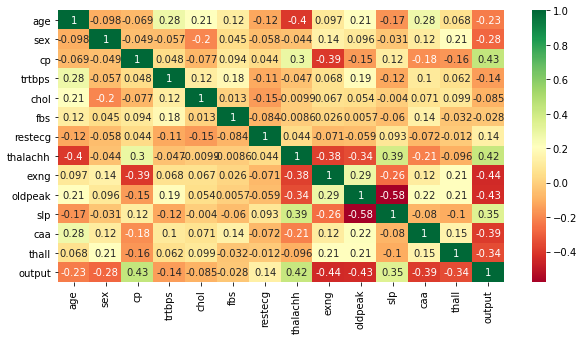

In [45]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [65]:
#absolute value of correlcation with output
output_corr = np.abs(corrmat['output'])
#selecting columns with correlaction of 0.19 and above
mask = output_corr >= 0.21
output_corr = output_corr[mask]
output_corr

age         0.225439
sex         0.280937
cp          0.433798
thalachh    0.421741
exng        0.436757
oldpeak     0.430696
slp         0.345877
caa         0.391724
thall       0.344029
output      1.000000
Name: output, dtype: float64

In [67]:
#dropping lesser important features 
output_corr.drop(columns=['trtbps','chol','fbs','restecg','output'], inplace=True)

In [68]:
#defining new input
features = output_corr.index
X =data[features]
y = data['output']

#split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [69]:
# Importing MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_x_train = scaler.fit_transform(x_train)
rescaled_x_test = scaler.transform(x_test)

In [70]:
#import the logistic regression model to train the dataset
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier
model_RF3=RandomForestClassifier(random_state=42)
model_RF3.fit(rescaled_x_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
# Using the predict function to predict the rescaled_X_test
RF3_prediction = model_RF3.predict(rescaled_x_test)

# Importing Confusion matrix and accuracy score to evaluate the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
matrix = confusion_matrix(y_test, RF3_prediction)
matrix

array([[33,  8],
       [ 7, 43]], dtype=int64)

In [72]:
#accuracy score
accuracy_score(y_test, RF3_prediction)*100

83.51648351648352

In [73]:
#recall score
recall_score(y_test, RF3_prediction)*100

86.0

In [74]:
#precision score
precision_score(y_test, RF3_prediction)*100

84.31372549019608

In [75]:
#saving the model to disk
import pickle
filename = "heart_failure_risk_model.sav"
pickle.dump(model_RF3, open(filename, 'wb'))

# we can conclude that the best model is the model_RF3, which is obtained after eliminating few features from the original features.
# final accuracy: 83.51
# final recall score: 86.0
# final precision score : 84.31